Train all four models and compare the output of the Dataset

1. Model 1: MP + TransposedConv + BCE
2. Model 2: MP + TransposedConv + Dice
3. Model 3: StridedConv + TransposedConv + BCE
4. Model 4: StridedConv + TransposedConv + Dice



In [ ]:
#Train Model 1 : MP + TransposedConv + BCE
!python train.py --model model1

Training model1 on cuda
100% 792M/792M [00:03<00:00, 240MB/s]
100% 19.2M/19.2M [00:00<00:00, 123MB/s] 
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 1/20 | Train Loss: 1.1754 | Val Loss: 1.0433
Epoch 2/20 | Train Loss: 1.0291 | Val Loss: 0.9529
Epoch 3/20 | Train Loss: 0.9762 | Val Loss: 0.9583
Epoch 4/20 | Train Loss: 0.9284 | Val Loss: 0.9046
Epoch 5/20 | Train Loss: 0.8760 | Val Loss: 0.8229
Epoch 6/20 | Train Loss: 0.8154 | Val Loss: 0.7661
Epoch 7/20 | Train Loss: 0.7606 | Val Loss: 0.7318
Epoch 8/20 | Train Loss: 0.7066 | Val Loss: 0.6877
Epoch 9/20 | Train Loss: 0.6615 | 

In [ ]:
#Train Model 2 : MP + TransposedConv + Dice
!python train.py --model model2

Training model2 on cuda
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 1/20 | Train Loss: 0.5146 | Val Loss: 0.3905
Epoch 2/20 | Train Loss: 0.3765 | Val Loss: 0.3685
Epoch 3/20 | Train Loss: 0.3615 | Val Loss: 0.3481
Epoch 4/20 | Train Loss: 0.3420 | Val Loss: 0.3253
Epoch 5/20 | Train Loss: 0.3198 | Val Loss: 0.3005
Epoch 6/20 | Train Loss: 0.2958 | Val Loss: 0.2776
Epoch 7/20 | Train Loss: 0.2739 | Val Loss: 0.2769
Epoch 8/20 | Train Loss: 0.2600 | Val Loss: 0.2572
Epoch 9/20 | Train Loss: 0.2444 | Val Loss: 0.2339
Epoch 10/20 | Train Loss: 0.2383 | Val Loss: 0.2372
Epoch 11/2

In [ ]:
#Train Model 3 : StridedConv + TransposedConv + BCE
!python train.py --model model3

Training model3 on cuda
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 1/20 | Train Loss: 1.1937 | Val Loss: 1.0712
Epoch 2/20 | Train Loss: 1.0212 | Val Loss: 0.9855
Epoch 3/20 | Train Loss: 0.9643 | Val Loss: 0.9624
Epoch 4/20 | Train Loss: 0.9252 | Val Loss: 0.9470
Epoch 5/20 | Train Loss: 0.9002 | Val Loss: 0.8810
Epoch 6/20 | Train Loss: 0.8314 | Val Loss: 0.8244
Epoch 7/20 | Train Loss: 0.7777 | Val Loss: 0.7833
Epoch 8/20 | Train Loss: 0.7423 | Val Loss: 0.7853
Epoch 9/20 | Train Loss: 0.6958 | Val Loss: 0.7615
Epoch 10/20 | Train Loss: 0.6889 | Val Loss: 0.6901
Epoch 11/2

In [ ]:

#Train Model 4 : StridedConv + TransposedConv + Dice
!python train.py --model model4

Training model4 on cuda
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 1/20 | Train Loss: 1.6700 | Val Loss: 1.5436
Epoch 2/20 | Train Loss: 1.5259 | Val Loss: 1.4453
Epoch 3/20 | Train Loss: 1.4263 | Val Loss: 1.3966
Epoch 4/20 | Train Loss: 1.3561 | Val Loss: 1.3437
Epoch 5/20 | Train Loss: 1.3049 | Val Loss: 1.2749
Epoch 6/20 | Train Loss: 1.2352 | Val Loss: 1.2846
Epoch 7/20 | Train Loss: 1.1312 | Val Loss: 1.1623
Epoch 8/20 | Train Loss: 1.0874 | Val Loss: 1.0892
Epoch 9/20 | Train Loss: 1.0114 | Val Loss: 1.0839
Epoch 10/20 | Train Loss: 0.9450 | Val Loss: 1.0677
Epoch 11/2

In [4]:
import torch
import torchvision.transforms as T
from torchvision.datasets import OxfordIIITPet
from PIL import Image
import matplotlib.pyplot as plt

from model import (
    Model1_MP_TR_BCE,
    Model2_MP_TR_DICE,
    Model3_Strided_TR_BCE,
    Model4_Strided_Bilinear_DICE,
)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", DEVICE)


Using device: cuda


In [5]:
# ===============================
# Load All 4 Models
# ===============================
CHECKPOINTS = {
    "Model1_MP_TR_BCE": ("model1_best.pth", Model1_MP_TR_BCE),
    "Model2_MP_TR_DICE": ("model2_best.pth", Model2_MP_TR_DICE),
    "Model3_Strided_TR_BCE": ("model3_best.pth", Model3_Strided_TR_BCE),
    "Model4_Strided_Bilinear_DICE": ("model4_best.pth", Model4_Strided_Bilinear_DICE),
}

models = {}

for name, (ckpt, cls) in CHECKPOINTS.items():
    model = cls().to(DEVICE)
    model.load_state_dict(torch.load(ckpt, map_location=DEVICE))
    model.eval()
    models[name] = model
    print(f"Loaded {name}")


Loaded Model1_MP_TR_BCE
Loaded Model2_MP_TR_DICE
Loaded Model3_Strided_TR_BCE
Loaded Model4_Strided_Bilinear_DICE


In [6]:
# ===============================
# Preprocessing
# ===============================
IMG_SIZE = 128

transform = T.Compose([
    T.Resize((IMG_SIZE, IMG_SIZE)),
    T.ToTensor(),
])


In [10]:
# ===============================
# Load a Sample Image from Dataset
# ===============================
dataset = OxfordIIITPet(
    root="./data",
    download=True,
    target_types="segmentation",
)

img, gt_mask = dataset[5]

input_tensor = transform(img).unsqueeze(0).to(DEVICE)

print("Sample image loaded")

Sample image loaded


In [11]:
# ===============================
# Run Inference for All Models
# ===============================
results = {}

with torch.no_grad():
    for name, model in models.items():
        logits = model(input_tensor)
        probs = torch.sigmoid(logits)
        mask = (probs > 0.5).float()
        results[name] = {
            "prob": probs[0, 0].cpu().numpy(),
            "mask": mask[0, 0].cpu().numpy(),
        }

print("Inference complete")

Inference complete


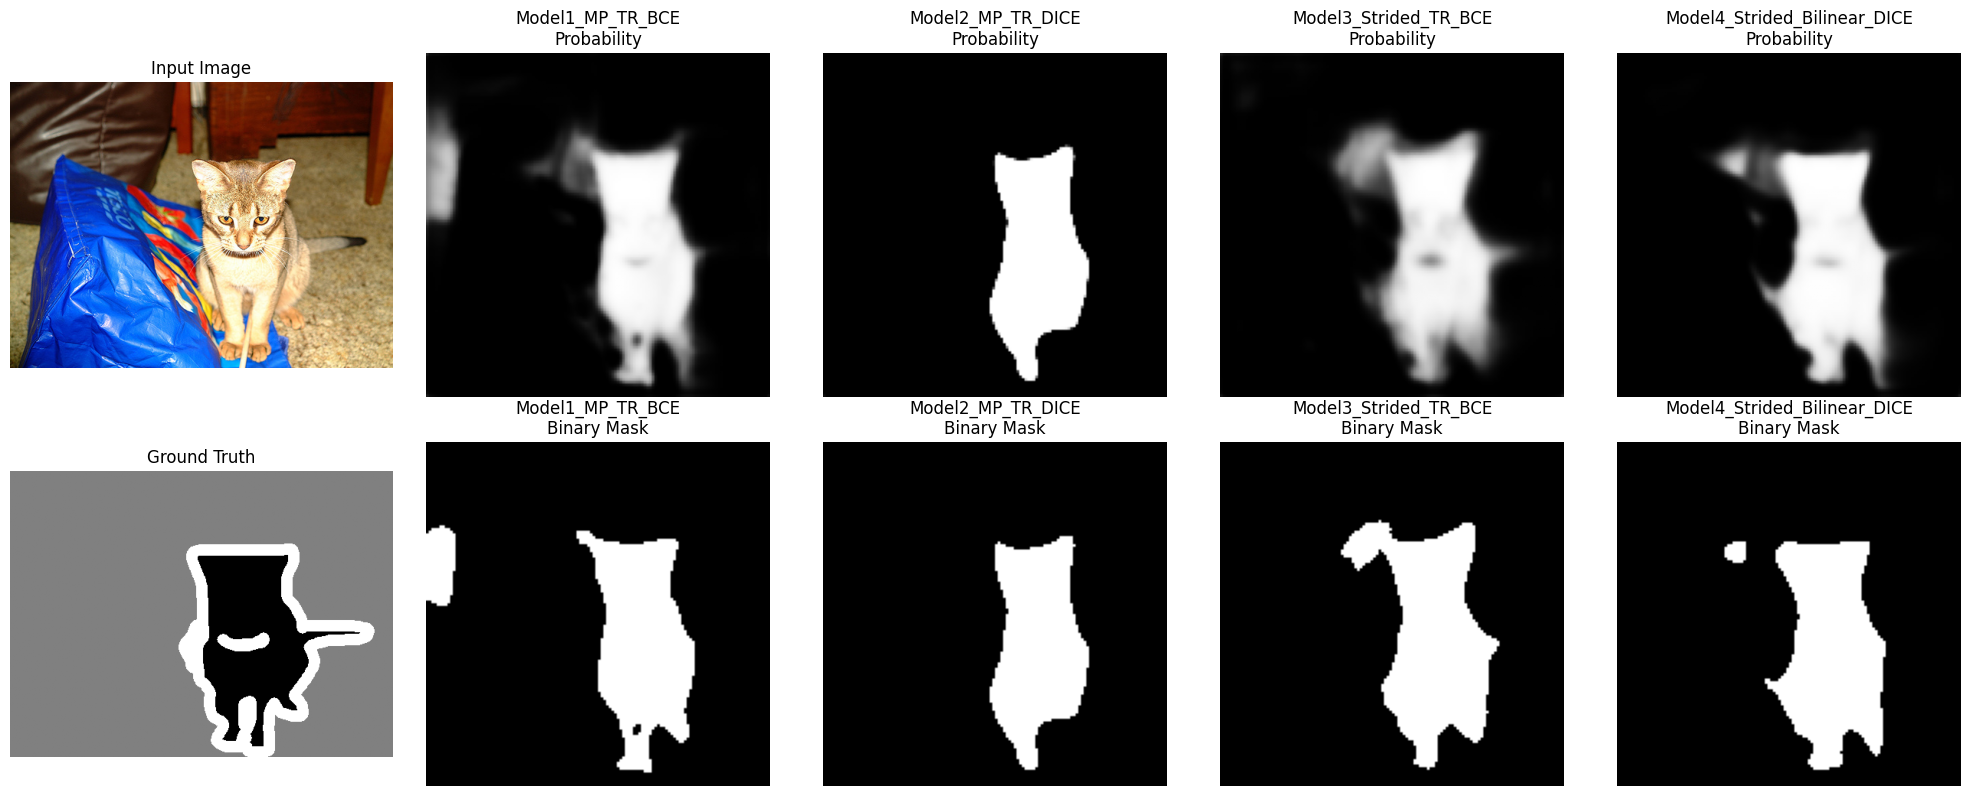

In [12]:

# ===============================
# Visualization: Side-by-Side Comparison
# ===============================
plt.figure(figsize=(20, 8))

# Input image
plt.subplot(2, 5, 1)
plt.imshow(img)
plt.title("Input Image")
plt.axis("off")

# Ground truth
plt.subplot(2, 5, 6)
plt.imshow(gt_mask, cmap="gray")
plt.title("Ground Truth")
plt.axis("off")

# Model outputs
for idx, (name, out) in enumerate(results.items(), start=2):
    plt.subplot(2, 5, idx)
    plt.imshow(out["prob"], cmap="gray")
    plt.title(name + "\nProbability")
    plt.axis("off")

    plt.subplot(2, 5, idx + 5)
    plt.imshow(out["mask"], cmap="gray")
    plt.title(name + "\nBinary Mask")
    plt.axis("off")

plt.tight_layout()
plt.show()
